In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("../../heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
pd.isnull(data).values.any()

False

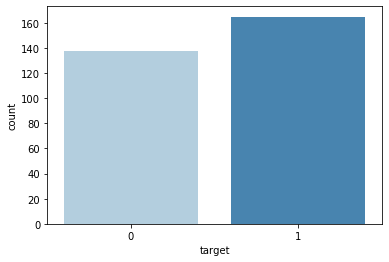

In [6]:
# target variable counts
sns.countplot(x="target", data=data, palette="Blues")

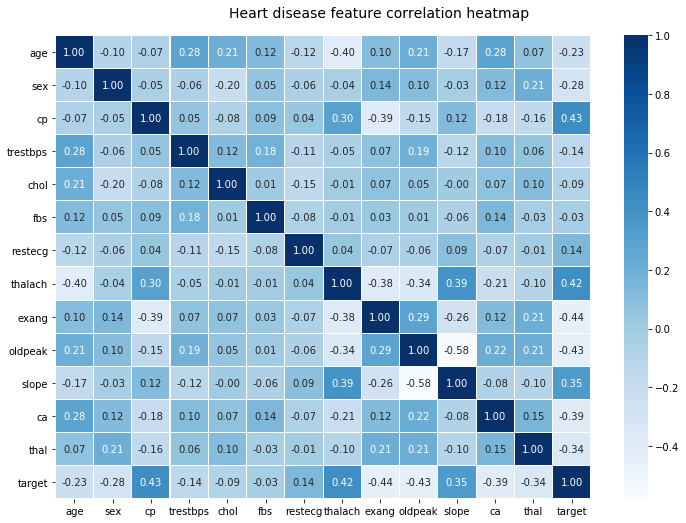

In [7]:
# Feature correlation matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [8]:
# separating X and y variables
X = data.drop(['target'], axis=1)
y = data['target']

In [9]:
X.shape, y.shape

((303, 13), (303,))

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
# separating the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [13]:
# Decision Tree classifier
classifier = DecisionTreeClassifier()

In [14]:
# fitting the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# predicting the outcome for testing data
y_pred = classifier.predict(X_test)

In [16]:
# measuring prediction accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7950819672131147


In [17]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        55
           1       0.85      0.76      0.80        67

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.79       122
weighted avg       0.80      0.80      0.80       122



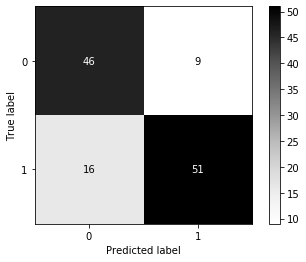

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap="Greys")  # doctest: +SKIP

In [19]:
# feature selection with recursive feature selection with cross validation

In [20]:
rfe_cv = RFECV(estimator=classifier, step=1, cv=10, scoring="accuracy")
rfe_cv = rfe_cv.fit(X_train, y_train)

In [21]:
print("Optimal number of features: ", rfe_cv.n_features_)
print("Best features: ", X_train.columns[rfe_cv.support_])

Optimal number of features:  12
Best features:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'ca', 'thal'],
      dtype='object')


In [22]:
rfe_cv.grid_scores_

array([0.63479532, 0.64561404, 0.61959064, 0.67923977, 0.72339181,
       0.70701754, 0.71812865, 0.67923977, 0.69561404, 0.6622807 ,
       0.70701754, 0.73508772, 0.67982456])

In [23]:
rfe_cv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

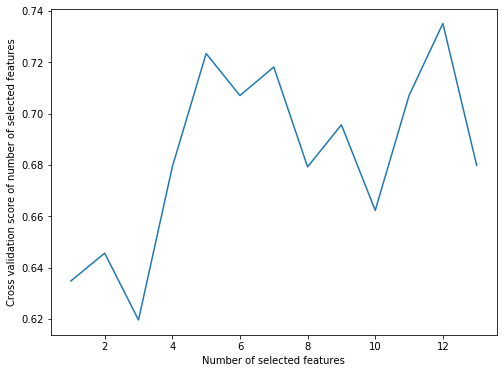

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of selected features")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfe_cv.grid_scores_)+1), rfe_cv.grid_scores_)
plt.show()

In [25]:
# transform the newly selected features
x_train_rfecv = rfe_cv.transform(X_train)
x_test_rfecv = rfe_cv.transform(X_test)

In [26]:
dt_rfecv_model = classifier.fit(x_train_rfecv, y_train)

In [27]:
y_pred_rfecv = classifier.predict(x_test_rfecv)

In [28]:
# model accuracy after class is balanced (accuracy reduces to 75%)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfecv))
print("***************************************************")
print(classification_report(y_test, y_pred_rfecv))

Accuracy: 0.819672131147541
***************************************************
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        55
           1       0.83      0.85      0.84        67

    accuracy                           0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122



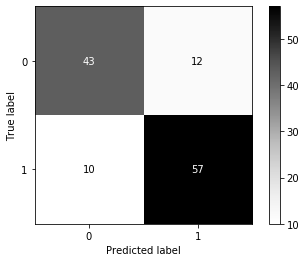

In [29]:
plot_confusion_matrix(dt_rfecv_model, x_test_rfecv, y_test, cmap="Greys")

In [30]:
#def generate_accuracy_and_heatmap(model, x, y):
 #   ac = metrics.accuracy_score(y, model.predict(x))
  #  f_score = metrics.f1_score(y, model.predict(x))
    
   # print("Accuracy: ", ac)
    #print("F1 score: ", f_score)
    #print("\n")
    #print(pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
     #                pd.Series(y['Outcome'], name='Actual')))
    #return 1

In [32]:
#generate_accuracy_and_heatmap(dt_rfecv_model, x_test_rfecv, y_test)